In [38]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON data
def load_json(file_path):
    with open(file_path, "r") as file:
        data = json.load(file)
    
    df = pd.DataFrame(data)
    df["labels"] = df["labels"].apply(lambda x: "Positive" if x else "Negative")
    return df

df = load_json("../validation_losses.json")
df['kind'] = 'With training'

df_no_train = load_json("../validation_losses_no-train.json")
df_no_train['kind'] = 'Without training'

df_ls1 = load_json("../validation_losses_ls1.json")
df_ls1['kind'] = 'Training with label smoothing 0.1'

df_ls2 = load_json("../validation_losses_ls2.json")
df_ls2['kind'] = 'Training with label smoothing 0.2'

df = pd.concat([df, df_no_train, df_ls1, df_ls2])

In [45]:
import seaborn as sns

def plot_losses(df_loss, axs, title):
    ax = sns.histplot(df_loss, x="losses", hue="labels", bins=50,stat="density", common_norm=False, ax=axs)
    ax.set_xlabel("Loss")
    ax.set_title(title)

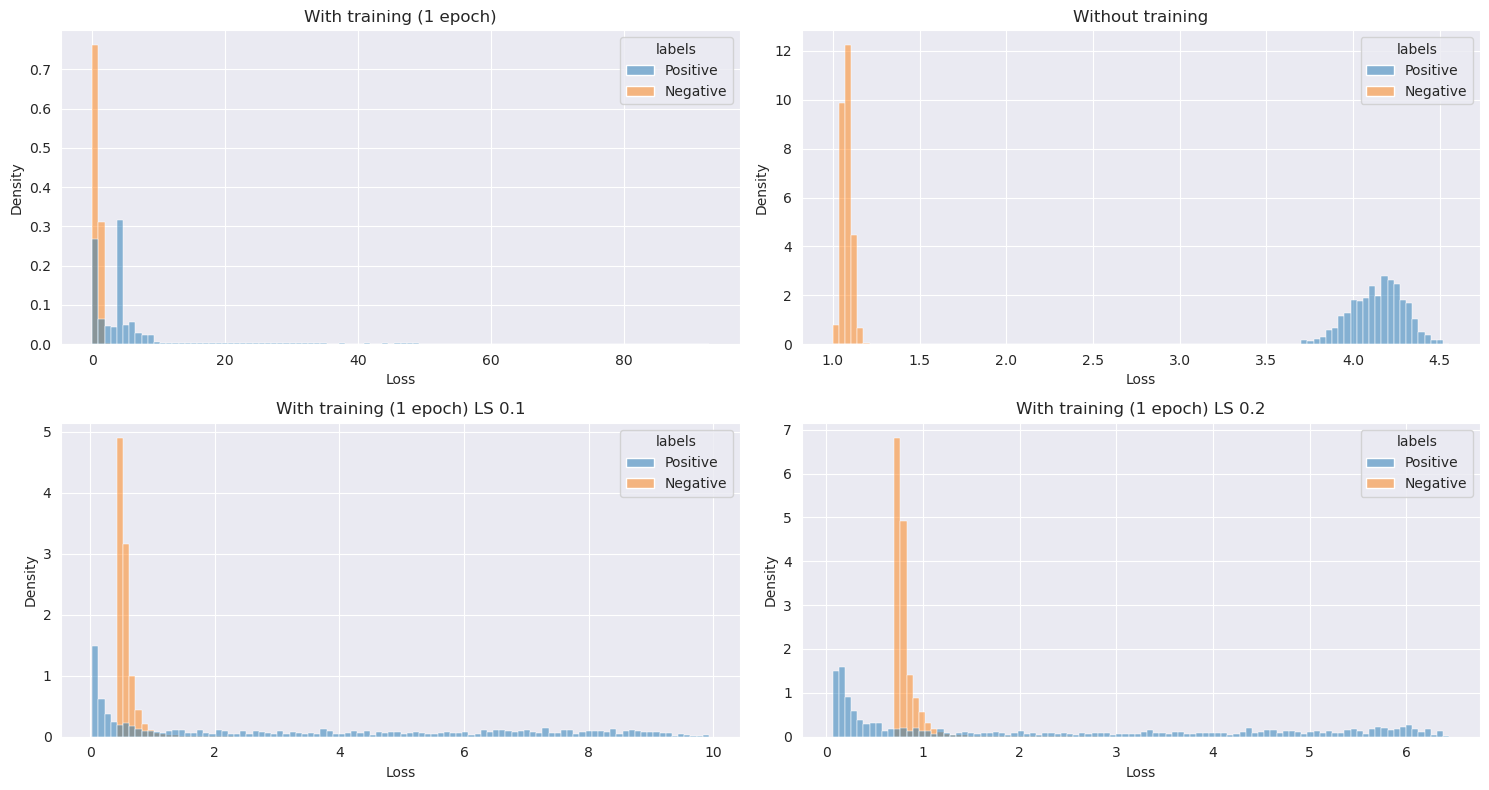

In [49]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 8))
plot_losses(df, axs[0, 0], "With training (1 epoch)")
plot_losses(df_no_train, axs[0, 1], "Without training")

plot_losses(df_ls1, axs[1, 0], "With training (1 epoch) LS 0.1")
plot_losses(df_ls2, axs[1, 1], "With training (1 epoch) LS 0.2")

fig.tight_layout()


In [30]:

print(df[df['labels'] == 'Negative']['losses'].sum())
df[df['labels'] == 'Negative']['losses'].describe() 


38600.4451774545


count    2950.000000
mean       13.084897
std        18.940604
min         0.039270
25%         3.967412
50%         4.208587
75%        13.701868
max        92.778366
Name: losses, dtype: float64

In [29]:

print(df[df['labels'] == 'Positive']['losses'].sum()) 
df[df['labels'] == 'Positive']['losses'].describe() 

348215.35053762794


count    611450.000000
mean          0.569491
std           0.534134
min           0.000051
25%           0.001038
50%           1.024249
75%           1.077891
max           5.396073
Name: losses, dtype: float64

In [35]:
df_pos = df[df['labels'] == 'Positive']
print(df_pos[df_pos['losses'] > 10]['losses'].sum()) 
print(df_pos[df_pos['losses'] <= 10]['losses'].sum()) 

30922.576139450073
7677.869038004428


In [32]:
df

,labels,losses,kind
0,Positive,0.486217,With training
1,Negative,0.507253,With training
2,Negative,0.904286,With training
3,Negative,0.000326,With training
4,Negative,0.000274,With training
...,...,...,...
307195,Negative,1.046278,Without training
307196,Negative,1.079041,Without training
307197,Negative,1.041811,Without training
307198,Negative,1.087536,Without training
